# Rendering images with Scenes
Scenes are the construct used to render pictures of meshes in Ascent. A scene description encapsulates all the information required to generate one or more images. Scenes can render mesh data published to Ascent or the result of an Ascent Pipeline.  This section of the tutorial provides a few simple examples demonstrating how to describe and render scenes. See Ascent's [Scene](https://ascent.readthedocs.io/en/latest/Actions/Scenes.html) docs for deeper details on scenes.

In [10]:
# remove this
import sys
sys.path.append("/Users/harrison37/Work/alpine/ascent/install-debug/python-modules/")

In [11]:
# cleanup any old results
!./cleanup.sh
# ascent + conduit imports
import conduit
import conduit.blueprint
import ascent

import numpy as np

# Jupyter imports
from IPython.display import Image
# helper we use when displaying results in the notebook
img_display_width = 500

### Prepare a tet mesh as in the prior Mesh Blueprint examples

In [12]:
mesh = conduit.Node()
# create an explicit coordinate set
x = np.array( [-1.0, 0.0, 0.0, 0.0, 1.0 ], dtype=np.float64 )
y = np.array( [0.0, -1.0, 0.0, 1.0, 0.0 ], dtype=np.float64 )
z = np.array( [ 0.0, 0.0, 1.0, 0.0, 0.0 ], dtype=np.float64 )

mesh["coordsets/coords/type"] = "explicit";
mesh["coordsets/coords/values/x"].set_external(x)
mesh["coordsets/coords/values/y"].set_external(y)
mesh["coordsets/coords/values/z"].set_external(z)

# reference the coordinate set by name
mesh["topologies/mesh/type"] = "unstructured"
mesh["topologies/mesh/coordset"] = "coords"
mesh["topologies/mesh/elements/shape"] = "tet"

connectivity = np.array([0, 1, 3, 2, 4, 3, 1, 2 ],dtype=np.int64)
mesh["topologies/mesh/elements/connectivity"].set_external(connectivity)

num_elements = 2
    
var1 = np.array([0,1],dtype=np.float32)
var2 = np.array([1,0],dtype=np.float32)

mesh["fields/var1/association"] = "element"
mesh["fields/var1/topology"] = "mesh"
mesh["fields/var1/volume_dependent"] = "false"
mesh["fields/var1/values"].set_external(var1)

mesh["fields/var2/association"] = "element"
mesh["fields/var2/topology"] = "mesh"
mesh["fields/var2/volume_dependent"] = "false"
mesh["fields/var2/values"].set_external(var2)

In [13]:
# make sure the mesh we created conforms to the blueprint
verify_info = conduit.Node()
if not conduit.blueprint.mesh.verify(mesh,verify_info):
    print("Mesh Verify failed!")
    print(verify_info.to_yaml())
else:
    print("Mesh verify success!")

Mesh verify success!


## Scene Example 1
### Using multiple scenes to render different variables

In [16]:
# render with ascent
a = ascent.Ascent()
a.open()

# publish mesh to ascent
a.publish(mesh);

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_scenes"

# declare a scenes to render the dataset

scenes = add_act["scenes"]
# our first scene (named 's1') will render the field 'var1'
scenes["s1/plots/p1/type"] = "pseudocolor";
scenes["s1/plots/p1/field"] = "var1";
scenes["s1/image_name"] = "out_scene_ex1_render_var1";

# our second scene (named 's2') will render the field 'var2'
# to the file out_scene_ex1_render_var2.png
scenes["s2/plots/p1/type"] = "pseudocolor";
scenes["s2/plots/p1/field"] = "var2";
scenes["s2/image_name"] = "out_scene_ex1_render_var2";



# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions)

a.close()


- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          field: "var1"
      image_name: "out_scene_ex1_render_var1"
    s2: 
      plots: 
        p1: 
          type: "pseudocolor"
          field: "var2"
      image_name: "out_scene_ex1_render_var2"



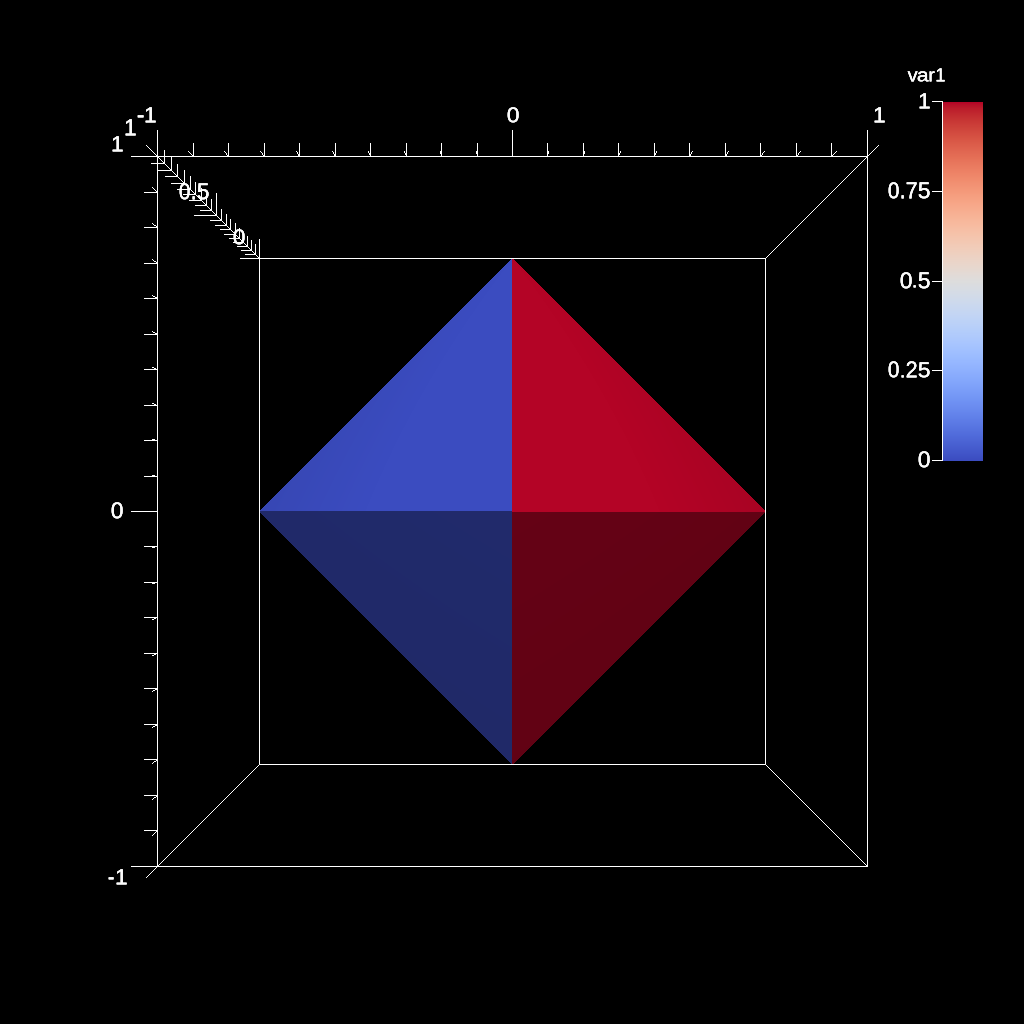

In [19]:
# Show scene 1 result
Image("out_scene_ex1_render_var1.png",width=img_display_width)

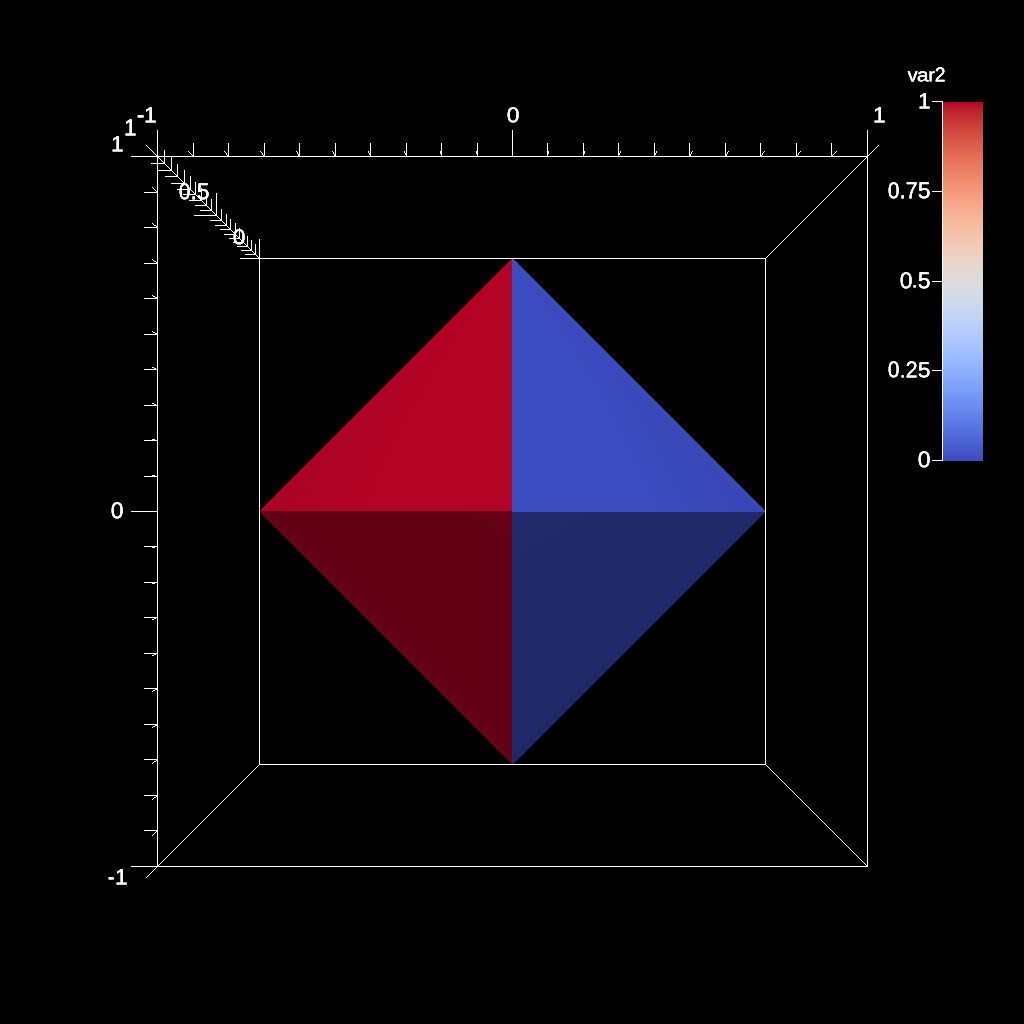

In [18]:
# Show scene 2 result
Image("out_scene_ex1_render_var2.png",width=img_display_width)

# Scene Example 2
## Rendering multiple plots to a single image

In [24]:
a = ascent.Ascent()
a.open()
a.publish(mesh)

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_scenes"

# declare a scene to render the dataset
scenes = add_act["scenes"]
# add a pseudocolor plot (`p1`)
scenes["s1/plots/p1/type"] = "pseudocolor"
scenes["s1/plots/p1/field"] = "var1"
# add a mesh plot (`p1`) 
# (experiment with commenting this out)
scenes["s1/plots/p2/type"] = "mesh"
scenes["s1/image_name"] = "out_scene_ex2_render_two_plots"

# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions)

a.close()


- 
  action: "add_scenes"
  scenes: 
    s1: 
      plots: 
        p1: 
          type: "pseudocolor"
          field: "var1"
        p2: 
          type: "mesh"
      image_name: "out_scene_ex2_render_two_plots"



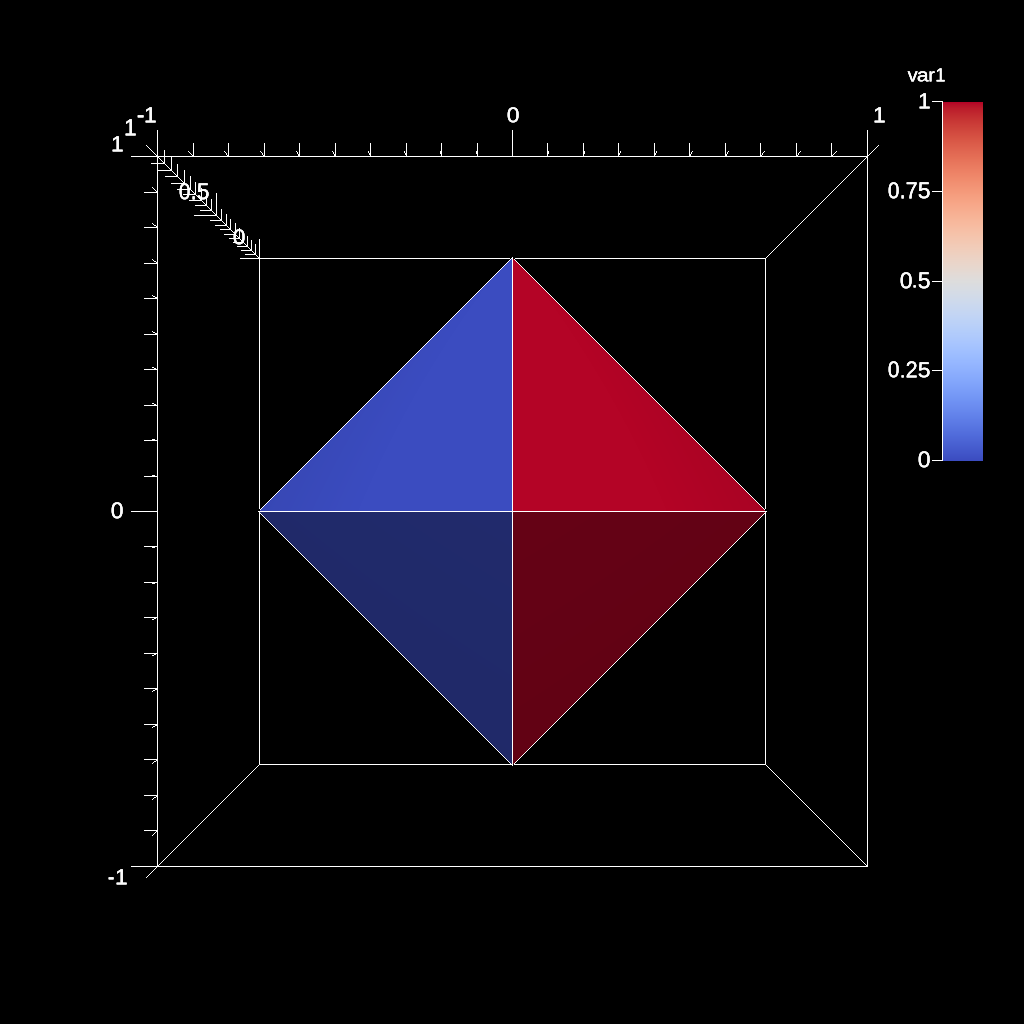

In [27]:
# The scene renders both plots togehter
Image("out_scene_ex2_render_two_plots.png",width=img_display_width)

# Example 3

In [ ]:
a = ascent.Ascent()
a.open()
a.publish(mesh)

# declare a scene to render the dataset
scenes = conduit.Node()
scenes["s1/plots/p1/type"] = "pseudocolor"
scenes["s1/plots/p1/field"] = "var1"
scenes["s1/renders/r1/image_name"] = "out_scene_ex2_view1_";
scenes["s1/renders/r2/image_name"] = "out_scene_ex2_view2_";
scenes["s1/renders/r2/camera/zoom"] = 3.0;

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_scenes"
add_act["scenes"] = scenes

# print our full actions tree
print(actions.to_yaml())

# execute
a.execute(actions)

a.close()

In [ ]:
# show the resulting images
Image("out_scene_ex2_view1_0.png",width=img_display_width)

In [ ]:
# show the resulting images
Image("out_scene_ex2_view2_0.png",width=img_display_width)

# Example 4

In [ ]:
a = ascent.Ascent()
a.open()
a.publish(mesh)

# declare a scene to render the dataset
scenes = conduit.Node()
scenes["s1/plots/p1/type"] = "pseudocolor";
scenes["s1/plots/p1/field"] = "var1"
scenes["s1/plots/p1/color_table/name"] = "Viridis"
scenes["s1/image_prefix"] = "out_scene_ex4_render_viridis_"

scenes["s2/plots/p1/type"] = "pseudocolor"
scenes["s2/plots/p1/field"] = "var1"
scenes["s2/plots/p1/color_table/name"] = "Inferno"
scenes["s2/image_prefix"] = "out_scene_ex4_render_inferno_"

# setup actions
actions = conduit.Node()
add_act = actions.append()
add_act["action"] = "add_scenes"
add_act["scenes"] = scenes

# print our full actions tree
print(actions.to_yaml())


# execute
a.execute(actions)

a.close()

In [ ]:
# show the resulting images
Image("out_scene_ex4_render_viridis_0.png",width=img_display_width)

In [ ]:
# show the resulting images
Image("out_scene_ex4_render_inferno_0.png",width=img_display_width)